### Test area
WebbPSF CGI test

In [ ]:
%pylab inline --no-import-all
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['image.interpolation'] = 'nearest'

import os
os.environ['WEBBPSF_PATH'] = '/home/marken/GitHub/webbpsf_data'
import webbpsf
from webbpsf import roman
import ipywidgets
from astropy.io import fits

webbpsf.setup_logging()

DM_on = roman.CGI(mode='CHARSPC_F770')
DM_on.dm1.set_actuator(15, 15, 1e-6)
DM_on.dm1.set_actuator(37, 37, 1e-6)

DM_on.raw_contrast(display=True)

In [ ]:
DM_on.dm1.display()

In [1]:
import logging
log = logging.getLogger()
mplfm_logger = logging.getLogger('matplotlib.font_manager')
mplcb_logger = logging.getLogger('matplotlib.colorbar')
mplt_logger = logging.getLogger('matplotlib.ticker')
mplbe_logger = logging.getLogger('matplotlib.backends')

mplfm_logger.setLevel(logging.WARNING)
mplcb_logger.setLevel(logging.WARNING)
mplt_logger.setLevel(logging.WARNING)
mplbe_logger.setLevel(logging.WARNING)

PASTIS test

In [2]:
from pastis.config import CONFIG_PASTIS
from pastis.hockeystick_contrast_curve import hockeystick_curve
from pastis.matrix_generation.matrix_building_numerical import MatrixIntensityRST
from pastis.pastis_analysis import run_full_pastis_analysis
from pastis.matrix_generation.matrix_from_efields import MatrixEfieldRST

import pastis.util as util
import os

In [ ]:
run_matrix = MatrixIntensityRST(initial_path=CONFIG_PASTIS.get('local', 'local_data_path'))
run_matrix.calc()
dir_run = run_matrix.overall_dir
util.setup_pastis_logging(dir_run, 'pastis_analysis')
result_dir = os.path.join(dir_run, 'results')
matrix_dir = os.path.join(dir_run, 'matrix_numerical')
hockeystick_curve(instrument='RST', matrixdir=matrix_dir, resultdir=result_dir, range_points=10, no_realizations=3)

In [ ]:
run_full_pastis_analysis(instrument='RST', run_choice=dir_run, c_target=1e-8)

In [ ]:
test = '/home/marken/GitHub/pastis_data/2021-06-07T09-20-43_rst'
test2 = '/home/marken/GitHub/pastis_data/2021-06-07T09-20-43_rst/matrix_numerical'
hockeystick_curve(instrument='RST', matrixdir=test2, resultdir=test, range_points=10, no_realizations=3)
#run_full_pastis_analysis(instrument='RST', run_choice=test, c_target=1e-8)

/home/marken/GitHub/pastis_data

2021-06-17 16:39:37,617 - root - INFO - LOG SETUP: Console will display messages of INFO or higher
2021-06-17 16:39:37,621 - root - INFO - LOG SETUP: Experiment log will save messages of INFO or higher to /home/marken/GitHub/pastis_data/2021-06-17T16-39-37_rst/matrix_numerical/pastis_matrix_rst.log
2021-06-17 16:39:37,623 - root - INFO - Building numerical matrix for rst

2021-06-17 16:39:37,624 - root - INFO - Instrument: rst
2021-06-17 16:39:37,624 - root - INFO - Wavelength: 7.7e-07 m
2021-06-17 16:39:37,625 - root - INFO - Number of segments: 4
2021-06-17 16:39:37,625 - root - INFO - Segment list: [0 1 2 3]
2021-06-17 16:39:37,626 - root - INFO - wfe_aber: 5e-09 m
Saving the configfile to outputs folder.
WebbPSF log messages of level ERROR and above will be shown.
WebbPSF log outputs will be directed to the screen.
[   root] Creating segmented mirror with 3 local modes each...
4
[   root] Total number of modes: 4
[   root] MODE NUMBER: 0
[   root] M

ValueError: operands could not be broadcast together with shapes (800,800) (256,256) 

<Figure size 432x288 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

<Figure size 576x576 with 0 Axes>

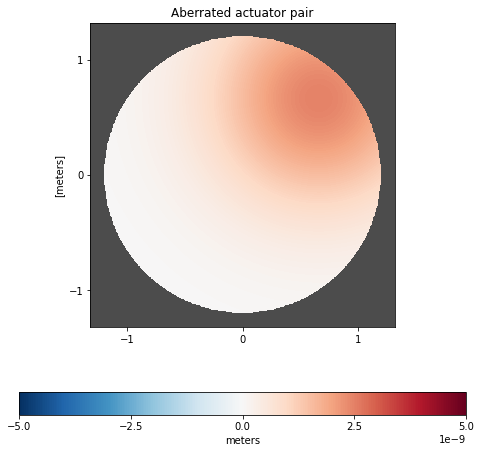

In [3]:
run_matrix = MatrixEfieldRST(initial_path=CONFIG_PASTIS.get('local', 'local_data_path'))
run_matrix.calc()
dir_run = run_matrix.overall_dir
util.setup_pastis_logging(dir_run, 'pastis_analysis')
result_dir = os.path.join(dir_run, 'results')
matrix_dir = os.path.join(dir_run, 'matrix_numerical')
#hockeystick_curve(instrument='RST', matrixdir=matrix_dir, resultdir=result_dir, range_points=10, no_realizations=3)

In [ ]:
contrast = np.arange(long*(nb_actu)**2).reshape(long, (nb_actu)**2)

In [ ]:
contrast

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
long = 75
nb_actu = 6

abb_list = [0.2*i*10**(-5-2*i%5) for i in range(long)]
#contrast = np.arange(long*(nb_actu)**2).reshape(long, (nb_actu)**2)
contrast = [i for i in range(long)]
sim_instance = roman.CGI(mode='CHARSPC_F770', nbactuator=nb_actu)
seg = 17

#for j in range(nb_actu**2):
for i in range(long):
    sim_instance.dm1.flatten()
    actu_x, actu_y = util.continous_dm_coo(nb_actu, seg)
    sim_instance.dm1.set_actuator(actu_x, actu_y, abb_list[i])
    contrast[i] = sim_instance.raw_contrast()


In [ ]:
log_contrast = np.log10(contrast)
log_abb = np.log10(abb_list)

plt.scatter(log_abb,log_contrast)
plt.xlabel('log amplitude actuator(m)')
plt.ylabel('log contrast')
plt.show()

In [ ]:
dir(DM_on)

In [ ]:
DM_on.calc_psf?

In [ ]:
unaberrated_ref_efield, inter= DM_on.calc_psf(nlambda=1, fov_arcsec=1.6,return_intermediates=True)

In [ ]:

efield_data = unaberrated_ref_efield[0].data
plt.imshow(efield_data)
plt.colorbar()

In [ ]:
inter[6].display(what='phase')


In [ ]:
dir(inter[4])

In [ ]:
wawefront = inter[6].wavefront

In [ ]:
intensity = abs(wawefront)**2
phase = np.angle(wawefront)

In [ ]:
plt.imshow(intensity)
plt.colorbar()

In [ ]:
inten = inter[6].intensity
plt.imshow(inten)
plt.colorbar()

In [ ]:
plt.imshow(phase)
plt.colorbar()

In [ ]:
DM_on.working_area(im=inten)
DM_on.WA
len(inten)